<a href="https://colab.research.google.com/github/praveensingh929/simpsons/blob/main/working_simpsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 15 kB/s 
     |████████████████████████████████| 1.7 MB 46.0 MB/s 
     |████████████████████████████████| 5.9 MB 48.1 MB/s 
     |████████████████████████████████| 438 kB 64.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [421, 418]

train_path = '/content/drive/MyDrive/simpsons/simpsons/train'
valid_path = '/content/drive/MyDrive/simpsons/simpsons/test'

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
 # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/simpsons/simpsons/train/*')

In [ ]:
folders

['/content/drive/MyDrive/simpsons/simpsons/train/2',
 '/content/drive/MyDrive/simpsons/simpsons/train/1',
 '/content/drive/MyDrive/simpsons/simpsons/train/0']

In [ ]:
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 421, 418, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 210, 208, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 210, 208, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/simpsons/simpsons/train',
                                                 target_size = (421,418),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 302 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/simpsons/simpsons/test',
                                            target_size = (421,418),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 148 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
10/10 [==============================] - 172s 17s/step - loss: 22.0119 - accuracy: 0.4470 - val_loss: 18.2751 - val_accuracy: 0.4865
Epoch 2/10
10/10 [==============================] - 13s 1s/step - loss: 8.8821 - accuracy: 0.6556 - val_loss: 5.0728 - val_accuracy: 0.6959
Epoch 3/10
10/10 [==============================] - 13s 1s/step - loss: 2.6116 - accuracy: 0.8411 - val_loss: 1.6596 - val_accuracy: 0.8446
Epoch 4/10
10/10 [==============================] - 13s 1s/step - loss: 1.2807 - accuracy: 0.9106 - val_loss: 4.0610 - val_accuracy: 0.7432
Epoch 5/10
10/10 [==============================] - 13s 1s/step - loss: 0.6439 - accuracy: 0.9503 - val_loss: 2.5489 - val_accuracy: 0.8243
Epoch 6/10
10/10 [==============================] - 15s 2s/step - loss: 0.2661 - accuracy: 0.9702 - val_loss: 4.2242 - val_accuracy: 0.7703
Epoch 7/10
10/10 [==============================] - 13s 1s/step - loss: 0.2602 - accuracy: 0.9636 - val_loss: 2.6826 - val_accuracy: 0.8108
Epoch 8/10
10/10

In [ ]:
import matplotlib.pyplot as plt

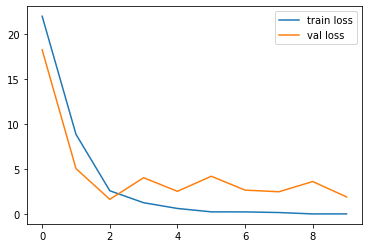

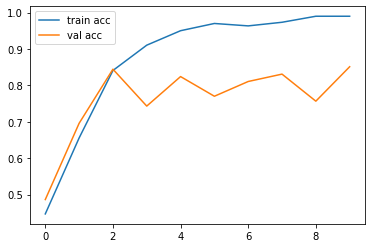

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_pred = model.predict(test_set)

5/5 [==============================] - 2s 226ms/step


In [ ]:
y_pred

array([[1.00000000e+00, 3.61996531e-23, 8.48608284e-23],
       [4.50282188e-21, 1.91033158e-32, 1.00000000e+00],
       [9.84807499e-03, 9.90151942e-01, 2.64782635e-13],
       [2.87697617e-07, 1.17856313e-13, 9.99999762e-01],
       [6.11877253e-21, 9.99402642e-01, 5.97306003e-04],
       [5.21204720e-06, 9.99994755e-01, 1.14009514e-11],
       [9.70518330e-21, 1.00000000e+00, 6.69333937e-20],
       [2.88890115e-20, 1.00000000e+00, 5.22060043e-12],
       [1.22926737e-20, 1.00000000e+00, 4.03054055e-14],
       [5.59677119e-06, 2.09674089e-17, 9.99994397e-01],
       [1.50329324e-14, 7.54143326e-23, 1.00000000e+00],
       [1.00000000e+00, 1.06049015e-11, 2.65704477e-23],
       [1.65880829e-05, 1.74644867e-07, 9.99983191e-01],
       [8.12240290e-14, 6.79138362e-01, 3.20861638e-01],
       [3.03790453e-30, 5.32173386e-14, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 1.27891253e-37],
       [1.00000000e+00, 4.22058827e-25, 9.90881207e-19],
       [1.00000000e+00, 1.50073

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 1, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 1, 0, 2, 2, 2, 0, 2, 0, 2, 1, 2, 0, 0, 0, 2, 1, 1, 1, 0,
       1, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 1, 1, 1, 2, 1, 2, 0, 1, 2,
       2, 2, 0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 1, 1, 2, 1,
       1, 0, 2, 2, 0, 1, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 1, 2, 0, 1, 0, 1,
       0, 2, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0,
       0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2])

In [ ]:
img=image.load_img('/content/drive/MyDrive/simpsons/grandpa/images.jpg',target_size = (421,418))

In [ ]:
x=image.img_to_array(img)

In [ ]:
x.shape

(421, 418, 3)

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 421, 418, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 0s 28ms/step


array([[1.0000000e+00, 4.3227174e-19, 2.5929690e-17]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 28ms/step


In [ ]:
a

array([0])

In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/simpsons/model_inception.h5')